# Real Estate Price Prediction

In [5]:
!pip install -r ../requirements.txt --quiet

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("https://statso.io/wp-content/uploads/2023/12/Real_Estate.csv")

df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [3]:
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [4]:
# Descriptive Statistics of Dataset
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


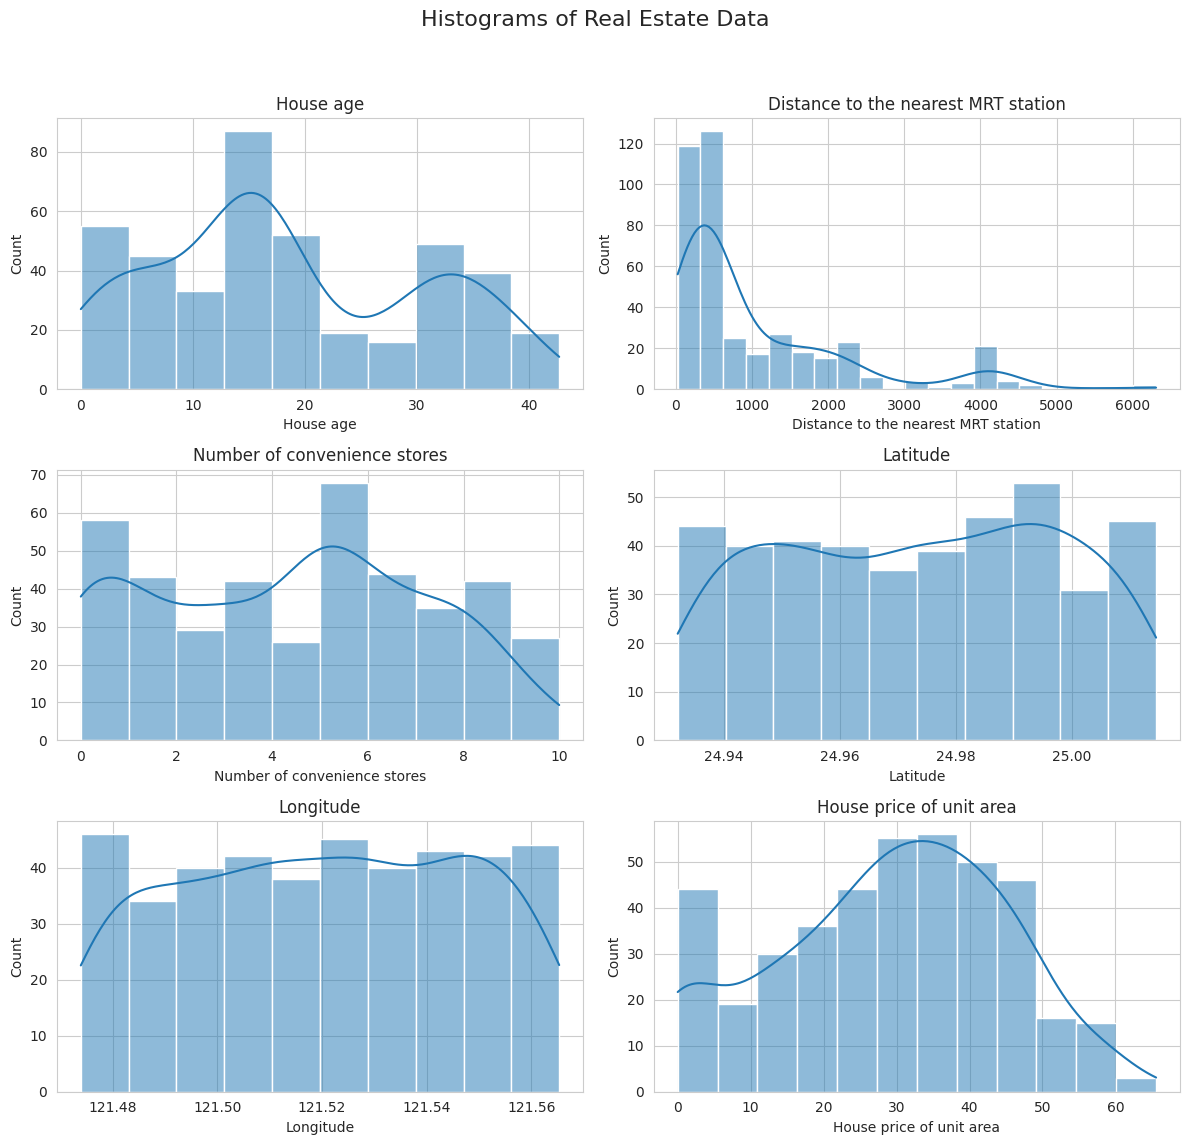

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for the numerical columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

cols = df.columns.tolist()[1:]

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

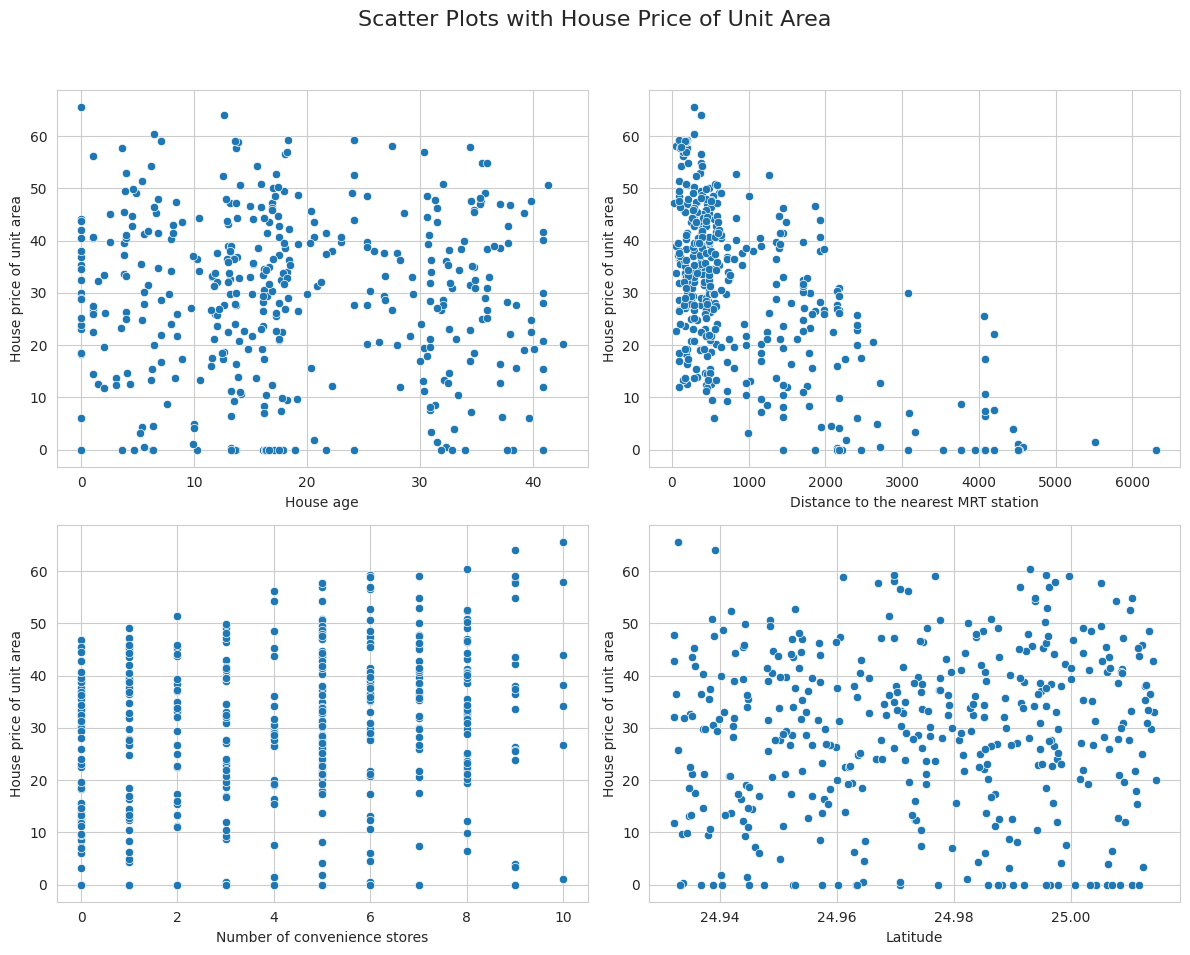

In [20]:
# Scatter plots to observe the relationship with house price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle("Scatter Plots with House Price of Unit Area", fontsize=16)

# Scatter plots for each variable against the house price
sns.scatterplot(data=df, x="House age", y="House price of unit area", ax=axes[0, 0])
sns.scatterplot(data=df, x="Distance to the nearest MRT station", y="House price of unit area", ax=axes[0, 1])
sns.scatterplot(data=df, x="Number of convenience stores", y="House price of unit area", ax=axes[1, 0])
sns.scatterplot(data=df, x="Latitude", y="House price of unit area", ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

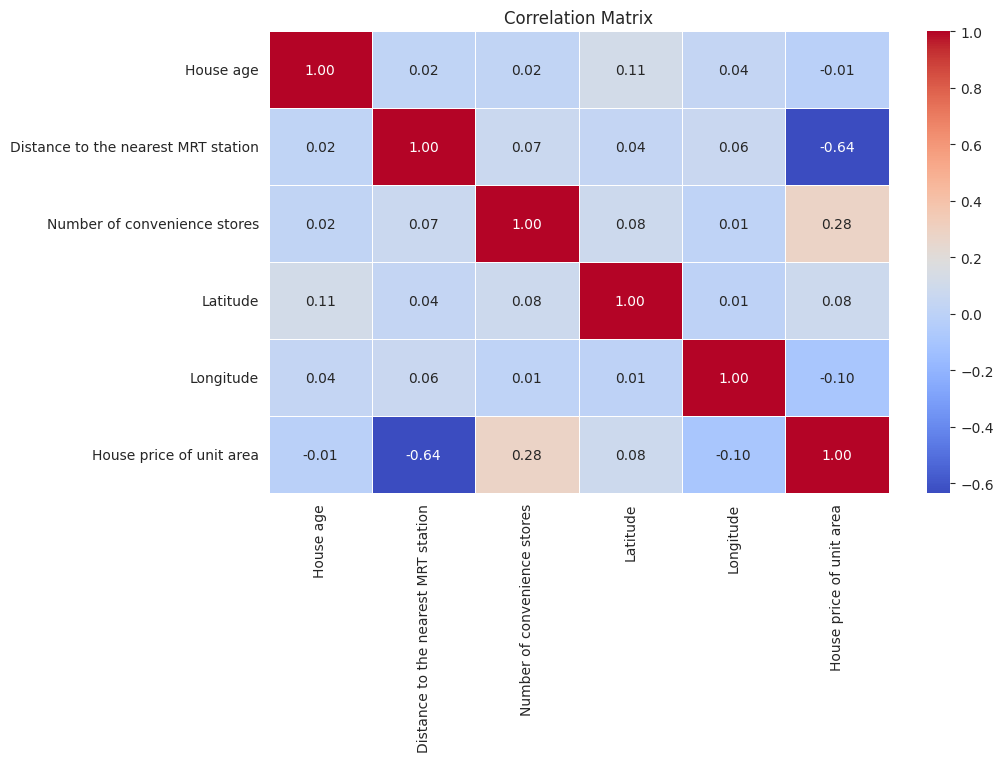

In [24]:
# Correlation Matrix
correlation_matrix = df[df.columns.tolist()[1:]].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [25]:
correlation_matrix

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
House age,1.000000,0.021596,0.021973,0.114345,0.036449,-0.012284
Distance to the nearest MRT station,0.021596,1.000000,0.069015,0.038954,0.064229,-0.636579
Number of convenience stores,0.021973,0.069015,1.000000,0.082725,0.013156,0.280763
Latitude,0.114345,0.038954,0.082725,1.000000,0.007754,0.081008
Longitude,0.036449,0.064229,0.013156,0.007754,1.000000,-0.098626
House price of unit area,-0.012284,-0.636579,0.280763,0.081008,-0.098626,1.000000


In [26]:
# Model Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Selecting Features and Target variable
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = df[features]
y = df[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Initialization
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

LinearRegression()

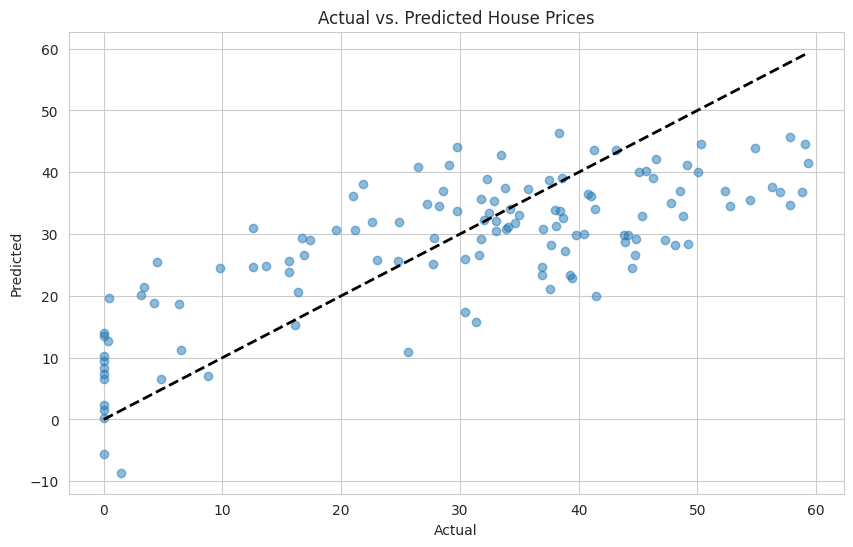

In [27]:
# Predictions
y_pred = model.predict(X_test)

# Visualization: Actual vs. Predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

In [29]:
# Accuracy of the model
print(r2_score(y_test, y_pred))

# Cost Function
print(mean_squared_error(y_test, y_pred))

0.5468603434119448
130.92715091918134
